# KNN--鸢尾花分类

In [23]:
'''
导包
'''
import numpy as py
import pandas as pd
from matplotlib import pyplot as plt
import csv
import random
import math
import operator

%matplotlib inline

In [24]:
#数据拆分  比例
m = 0.7
#设置K值
k=3

In [25]:
'''
数据处理
'''
#训练集
train_data = []
#测试集
test_data = []
with open('lris.txt', 'r') as cf:
    lines = csv.reader(cf)
    data = list(lines)
    
    for x in range(len(data) - 1):
        for y in range(4):
            data[x][y] = float(data[x][y])
            
        #将数据集按比例分开（7:3）
        if random.random() < m:
            train_data.append(data[x])
        else:
            test_data.append(data[x])
#查看数据集
print(test_data)
print(train_data)
#查看数据长度
print(f'测试集长度：{len(test_data)} ')
print(f'训练集长度：{len(train_data)} ')

[[4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], [5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'], [5.2, 2.7, 3.9, 1.4, 'Iris-versicolor'], [5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'], [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'], [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], [5.9, 3.2, 4.8, 1.8, 'Iris-versicolor'], [6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'], [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'], [6.8, 2.8, 4.8, 1.4, 'Iris-versicolor'], [

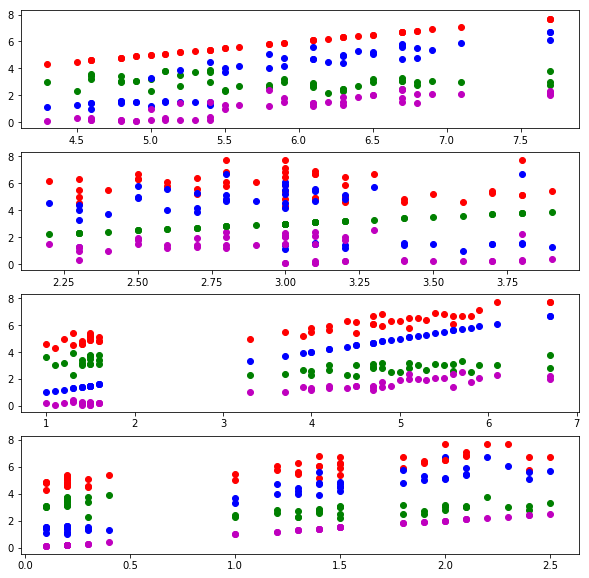

In [26]:
'''
画图
'''
f,ax=plt.subplots(4,1,figsize=(10,10))
for i in range (len(test_data)):
        ax[0].scatter(test_data[i][0],test_data[i][0],label='skitcat',color='r',marker='o')
        ax[0].scatter(test_data[i][0],test_data[i][1],label='skitcat',color='g',marker='o')
        ax[0].scatter(test_data[i][0],test_data[i][2],label='skitcat',color='b',marker='o')
        ax[0].scatter(test_data[i][0],test_data[i][3],label='skitcat',color='m',marker='o')
        ax[1].scatter(test_data[i][1],test_data[i][0],label='skitcat',color='r',marker='o')
        ax[1].scatter(test_data[i][1],test_data[i][1],label='skitcat',color='g',marker='o')
        ax[1].scatter(test_data[i][1],test_data[i][2],label='skitcat',color='b',marker='o')
        ax[1].scatter(test_data[i][1],test_data[i][3],label='skitcat',color='m',marker='o')
        ax[2].scatter(test_data[i][2],test_data[i][0],label='skitcat',color='r',marker='o')
        ax[2].scatter(test_data[i][2],test_data[i][1],label='skitcat',color='g',marker='o')
        ax[2].scatter(test_data[i][2],test_data[i][2],label='skitcat',color='b',marker='o')
        ax[2].scatter(test_data[i][2],test_data[i][3],label='skitcat',color='m',marker='o')
        ax[3].scatter(test_data[i][3],test_data[i][0],label='skitcat',color='r',marker='o')
        ax[3].scatter(test_data[i][3],test_data[i][1],label='skitcat',color='g',marker='o')
        ax[3].scatter(test_data[i][3],test_data[i][2],label='skitcat',color='b',marker='o')
        ax[3].scatter(test_data[i][3],test_data[i][3],label='skitcat',color='m',marker='o')

In [27]:
'''
距离公式
'''
#欧式距离
def d_euc(test_data_1, train_data_1, l):
    d = 0
    for i in range(l):
        d += pow((test_data_1[i] - train_data_1[i]), 2)
    d = np.sqrt(d)
    return d


#曼哈顿距离
def d_man(test_data_1, train_data_1, l):
    d = 0
    for i in range(l):
        d += np.abs(test_data_1[i] - train_data_1[i])

    return d


In [28]:
def KNN(k, test_data_each):
    #存放距离
    distances_1 = []
    distances_2 = []
    #每组数据 5 个参数，4个值，循环 4 次
    l = len(test_data_each) - 1
    #求去到每个训练数据的距离，存放到distances
    for i in range(len(train_data)):
        #曼哈顿距离，欧式距离
        dist_1 = d_euc(test_data_each, train_data[i], l)
        dist_2 = d_man(test_data_each,train_data[i],l)
        distances_1.append((train_data[i], dist_1))
        distances_2.append((train_data[i],dist_2))
    #根据距离排序   
    distances_1.sort(key=operator.itemgetter(1))
    distances_2.sort(key=operator.itemgetter(1))
    
    neighbors_1 = []
    neighbors_2 = []
    for j in range(k):
        #取 前 k 个 作为 要预测的结果，存放到
        neighbors_1.append(distances_1[j][0])
        neighbors_2.append(distances_2[j][0])
    return neighbors_1,neighbors_2

In [29]:
'''
分类决策规则---多数表决法
'''
def majority_voting(neighbors):
    class_count = {}
    for i in range(len(neighbors)):
        #获取花的类别，索引值 -1
        type = neighbors[i][-1]
        #对类别开始计数
        if type in class_count:
            class_count[type] += 1
        else:
            class_count[type] = 1
    #排序，选取计数最大的那个作为预测结果
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    
    return sorted_class_count[0][0]

In [30]:
'''
求取预测的准确率
'''
def accuracy(predictions):
    #计数
    n=0
    for i in range(len(test_data)):
        #如果真实值=预测值   ，  ++
        if test_data[i][-1] == predictions[i]:
            n += 1
    return (n/ float(len(test_data)))

In [31]:
'''
主函数
'''
#预测结果
predictions_ecu = []
predictions_man = []
#设置K值

for i in range(len(test_data)):
    neighbors_1,neighbors_2 = KNN(k, test_data[i])
    #print(neighbors)
    result_1 = majority_voting(neighbors_1)
    result_2 = majority_voting(neighbors_2)
    predictions_ecu.append(result_1)
    predictions_man.append(result_2)
    print(f'欧式距离预测结果= {result_1}  ||   曼哈顿距离预测结果{result_2}    ||  真实结果= {test_data[i][-1]} ')
data_accuracy_1 = accuracy(predictions_ecu)
data_accuracy_2 = accuracy(predictions_man)
#查看预测准确率
print(f'欧式距离准确率:{data_accuracy_1} ')
print(f'曼哈顿准确率:{data_accuracy_2} ')

欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||   曼哈顿距离预测结果Iris-setosa    ||  真实结果= Iris-setosa 
欧式距离预测结果= Iris-setosa  ||